<a href="https://colab.research.google.com/github/eunterko/MAT421/blob/main/ModuleE_Section_3_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 3: Calculus and Optimization**

# *3.2 Continuity and Differentiation*

To build up to our understanding of differentiation, we must first start with the limit. The limit of a function f(x) is essentially a value that the function approaches as x approaches a certain value c. From SymPy, we have the method limit(f,x,c), which we can use to evaluate the limit of some function, say f = 2sin(x)/x, at the point x = 0:

In [ ]:
from sympy import *

x = symbols('x')
f = 2*sin(x)/x

print("Function is {}".format(f))

f_limit = limit(f, x, 0) 

print("Limit of the function as x approaches 0 is {}".format(f_limit))

Function is 2*sin(x)/x
Limit of the function as x approaches 0 is 2


Using this definition, we say that a function f is continuous at a point c if the limit of f as a approaches c is equivalent to the value of f evaluated at point c. For example, let's check the continuity of f = x^2 - x at 2:

In [ ]:
from sympy import *

x = symbols('x')
f = x**2 - x

print("Function is {}".format(f))

f_limit = limit(f, x, 2) 

print("The function is continuous at x = 2:", f_limit == (2**2 - 2))

Function is x**2 - x
The function is continuous at x = 2: True


With this understanding of limits and continuity, we can now define the derivative f' as the infinitessimal change in a function f, or rather, as the limit as h approaches 0 of f(x+h) - f(x) divided by h. There are a variety of methods and rules for taking derivatives, and thankfully from SymPy, we have the method f.diff(x), which takes the derivative of f with respect to x. Considering the functions mentioned above, we can find their derivatives to be:

In [ ]:
from sympy import *

x = symbols('x')
f1 = 2*sin(x)/x
f1_diff = f1.diff(x)

print("The derivative of f = 2*sin(x)/x is {}".format(f1_diff))

f2 = x**2 - x
f2_diff = f2.diff(x)

print("The derivative of f = x**2 - x is {}".format(f2_diff))

The derivative of f = 2*sin(x)/x is 2*cos(x)/x - 2*sin(x)/x**2
The derivative of f = x**2 - x is 2*x - 1


Using the derivative, we can consider Taylor Series representations of functions around a given point. For a continuous, differentiable function f over x = [a,b], the Taylor Series representation is given by:

In [ ]:
# f(b) = f(a) + (b - a)f'(a) + (1/2)(b - a)^2f''(a) + (1/6)(b - a)^3f'''(a) + ...

Using this expression, let's take a look at the Taylor Series approximation for sine, up to the fifth order, centered at 0.

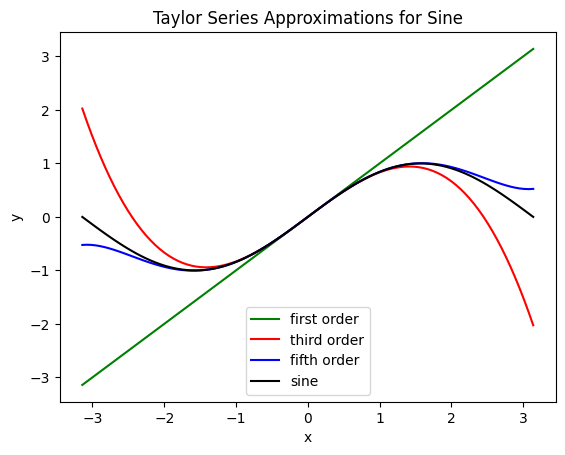

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

def f_first_order(x):
    return np.sin(0) + (x - 0) * (np.cos(0))

def f_third_order(x):
    return np.sin(0) + (x - 0) * (np.cos(0)) - (1/2) * (x - 0)**2 * (np.sin(0)) - (1/6) * (x - 0)**3 * (np.cos(0))
    
def f_fifth_order(x):
    return np.sin(0) + (x - 0) * (np.cos(0)) - (1/2) * (x - 0)**2 * (np.sin(0)) - (1/6) * (x - 0)**3 * (np.cos(0)) + (1/24) * (x - 0)**4 * (np.sin(0)) + (1/120) * (x - 0)**5 * (np.cos(0))

x = np.linspace(-np.pi,np.pi,100)
plt.figure
plt.plot(x,f_first_order(x),'g',label = 'first order')
plt.plot(x,f_third_order(x),'r',label = 'third order')
plt.plot(x,f_fifth_order(x),'b',label = 'fifth order')
plt.plot(x,np.sin(x),'k',label = 'sine')
plt.title('Taylor Series Approximations for Sine')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

# *3.3 Unconstrained Optimization*

Unconstrained optimization is essentially the process of finding a local or global minimum for a differentiable function over a domain. Minima are points x_min for which f(x)>=f(x_min) for all x in the domain we are considering (the entire domain for global minima, and only a certain portion of the domain for local minima). Oftentimes, the process of locating these local or global minima involves evaluating the behavior of the function and its derivatives.

The concept of convexity also plays a role in this process. A function is convex if a line connecting any two points on the function lies above the function. For convex functions, then, our local minima are also global minima. Let's take a look a two functions, one of which is convex with a global minima, and one of which is not convex with a global and local minimum.

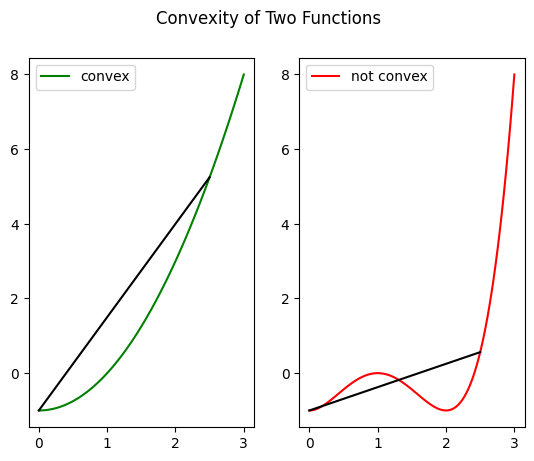

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def f_convex(x):
    return x**2 - 1

def f_not_convex(x):
    return (x-1)**4 - 2*(x-1)**2

x_points = [0, 2.5]
y_points_c = [f_convex(0), f_convex(2.5)]
y_points_nc = [f_not_convex(0), f_not_convex(2.5)]

x = np.linspace(0,3,100)
#plt.figure
fig, (plt1, plt2) = plt.subplots(1, 2)
plt1.plot(x,f_convex(x),'g',label = 'convex')
plt2.plot(x,f_not_convex(x),'r',label = 'not convex')
plt1.plot(x_points,y_points_c,'k-')
plt2.plot(x_points,y_points_nc,'k-')
fig.suptitle('Convexity of Two Functions')
#plt.xlabel('x')
#plt.ylabel('y')
plt1.legend();
plt2.legend();

Further methods for iterative unconstrained optimization involve using gradients or vector derivatives to find the direction to take the next step in order to locate a global or local minimum.